In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
df=pd.read_csv("blueberry_hydroponic_train_new_new.csv")
df.head()

,id,air_temp,conductivity,humidity,pH,sulphur,temperature_c,ppm,pHlow,pHhigh,temperature_clow,temperature_chigh,ppmlow,ppmhigh
0,373601,75.81,1.89392,20.2,4.297,56.8,23.3,1352.24,0,0,0,0,0,0
1,373602,75.31,1.84589,20.9,5.113,43.0,23.9,1268.65,0,0,0,0,0,0
2,373603,75.53,1.85983,20.8,4.253,74.2,23.6,1282.80,0,0,0,0,0,0
3,373604,76.01,1.92501,20.8,4.691,35.6,23.3,1286.87,0,0,0,0,0,0
4,373605,75.73,1.81027,21.4,5.156,51.2,22.1,1284.18,0,0,0,0,0,0


In [20]:
X = df.drop(columns=['id','pHlow','pHhigh','temperature_clow','temperature_chigh','ppmlow','ppmhigh'])
X.head()

,air_temp,conductivity,humidity,pH,sulphur,temperature_c,ppm
0,75.81,1.89392,20.2,4.297,56.8,23.3,1352.24
1,75.31,1.84589,20.9,5.113,43.0,23.9,1268.65
2,75.53,1.85983,20.8,4.253,74.2,23.6,1282.80
3,76.01,1.92501,20.8,4.691,35.6,23.3,1286.87
4,75.73,1.81027,21.4,5.156,51.2,22.1,1284.18


In [21]:
from sklearn import preprocessing
from sklearn import utils
y=df.drop(columns=['id','air_temp','conductivity','humidity','pH','sulphur','temperature_c','ppm'])
y.head()

,pHlow,pHhigh,temperature_clow,temperature_chigh,ppmlow,ppmhigh
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))


0.9960289855072464


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9960289855072464


In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


In [25]:
# X is our features matrix with 150 x 4 dimension
print(X.shape)
# y is our response vector with 150 x 1 dimension
print(y.shape)

(34500, 7)
(34500, 6)


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [27]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(20700, 7)
(13800, 7)


In [28]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(20700, 6)
(13800, 6)


In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9826086956521739


In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9826086956521739


In [31]:
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)


[0.9906521739130435, 0.9723188405797102, 0.9852173913043478, 0.9710869565217392, 0.9826086956521739, 0.9690579710144928, 0.9799275362318841, 0.967536231884058, 0.9775362318840579, 0.9648550724637681, 0.9765942028985507, 0.965, 0.9744202898550725, 0.9651449275362319, 0.973768115942029, 0.9647826086956521, 0.972463768115942, 0.9640579710144928, 0.9717391304347827, 0.9640579710144928, 0.9721739130434782, 0.962391304347826, 0.9707971014492753, 0.9628260869565217, 0.9705072463768116]


Text(0, 0.5, 'Testing Accuracy')

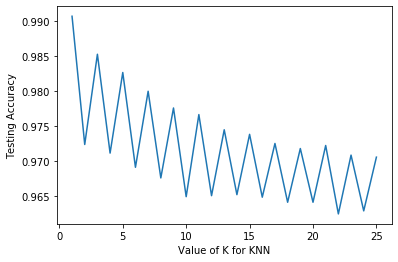

In [32]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [43]:
import numpy as np
knn = KNeighborsClassifier(n_neighbors=25)
import array as arr
# train the model with X and y (not X_train and y_train)
knn.fit(X, y)
#arr = np.array(75.81,1.89392,20.2,4.297,56.8,23.3,1352.24)
#arr.reshape(-1,1)
arr1 =  [75.81,1.89392,20.2,4.297,56.8,23.3,1352.24]

# make a prediction for an out-of-sample observation
knn.predict([arr1])

array([[0, 0, 0, 0, 0, 0]], dtype=int64)

In [40]:
'''
X1=X.drop(columns=['pH'])
lr=LinearRegression()
X2=X.drop(columns=['air_temp','conductivity','humidity','sulphur','temperature_c','ppm'])
'''

In [48]:
#Multivariate regression to predict pH YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYYYYYYYYYYYYYYYYY
X1=X[['air_temp','conductivity','humidity','sulphur','temperature_c','ppm']]
Y1=X['pH']
lr=LinearRegression()
lr.fit(X1,Y1)
predictedpH=lr.predict([[75.81,1.89392,20.2,65.8,26.5,1552.24]])
print(predictedpH)

[5.78793015]
